# Section 1 - Process the antenna density datasets so they are easy to import and join with LSOA in QGIS 2.7

In [2]:
import pandas as pd

root_dir = "C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//AntennaDensity_by_Day//"
result_dir = "C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//AntennaDensity_by_Day//grouped_and_filtered//"

# define file location
residents_weekdays_loc = root_dir + "AntennaDensity_residents_weekdays_October-November_2018.csv"
residents_weekends_loc = root_dir + "AntennaDensity_residents_weekends_October-November_2018.csv"
non_residents_weekdays_loc = root_dir + "AntennaDensity_non_residents_weekdays_October-November_2018.csv"
non_residents_weekends_loc = root_dir + "AntennaDensity_non_residents_weekends_October-November_2018.csv"
antenna_location_loc = "C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//telefonica_antenna_london.csv"

# read the files to pandas and rename columns to match antenna_location file columns for later grouping
residents_weekdays = pd.read_csv(residents_weekdays_loc)
residents_weekends = pd.read_csv(non_residents_weekdays_loc)
residents_weekdays = residents_weekdays.rename(columns={'antenna_id': 'lkey', 'sum(sum(time))': 'sum_time', 'sum(count(antenna_id))': 'sum_devices'})
residents_weekends = residents_weekends.rename(columns={'antenna_id': 'lkey', 'sum(sum(time))': 'sum_time', 'sum(count(antenna_id))': 'sum_devices'})

non_residents_weekdays = pd.read_csv(non_residents_weekdays_loc)
non_residents_weekends = pd.read_csv(non_residents_weekends_loc)
non_residents_weekdays = non_residents_weekdays.rename(columns={'antenna_id': 'lkey', 'sum(sum(time))': 'sum_time', 'sum(count(antenna_id))': 'sum_devices'})
non_residents_weekends = non_residents_weekends.rename(columns={'antenna_id': 'lkey', 'sum(sum(time))': 'sum_time', 'sum(count(antenna_id))': 'sum_devices'})

# join the residents and non_residents to 3rd type of dataset(all people)
alll_weekdays = residents_weekdays.append(non_residents_weekdays).groupby(['lkey']).agg({"sum_time": "sum", "sum_devices": "sum"})
alll_weekends = residents_weekends.append(non_residents_weekends).groupby(['lkey']).agg({"sum_time": "sum", "sum_devices": "sum"})

# divide the time count of devices by number of days to get daily density
# November 2018 - 22 weekdays
#                  8 weekends
# October 2018  - 23 weekdays
#                  8 weekends
alll_weekdays.sum_time = alll_weekdays.sum_time/45
alll_weekdays.sum_devices = alll_weekdays.sum_time/45
alll_weekends.sum_time = alll_weekends.sum_time/16
alll_weekends.sum_devices = alll_weekends.sum_time/16

residents_weekdays.sum_time = residents_weekdays.sum_time/45
residents_weekdays.sum_devices = residents_weekdays.sum_time/45
residents_weekends.sum_time = residents_weekends.sum_time/16
residents_weekends.sum_devices = residents_weekends.sum_time/16

non_residents_weekdays.sum_time = non_residents_weekdays.sum_time/45
non_residents_weekdays.sum_devices = non_residents_weekdays.sum_time/45
non_residents_weekends.sum_time = non_residents_weekends.sum_time/16
non_residents_weekends.sum_devices = non_residents_weekends.sum_time/16

# read antenna file to pandas
antenna_location = pd.read_csv(antenna_location_loc)
antenna_location = antenna_location[['generation','easting','northing','lkey']]

C:\Users\superpalo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,5,8,9,10,11,12,20,21,22,23,24,29,30,37,38,41,49,50,51,52,53,54,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [80]:
# assign location of antennas to datasets
alll_weekdays = pd.merge(alll_weekdays, antenna_location, on='lkey', how='inner')
alll_weekends = pd.merge(alll_weekends, antenna_location, on='lkey', how='inner')
residents_weekdays = pd.merge(residents_weekdays, antenna_location, on='lkey', how='inner')
residents_weekends = pd.merge(residents_weekends, antenna_location, on='lkey', how='inner')
non_residents_weekdays = pd.merge(non_residents_weekdays, antenna_location, on='lkey', how='inner')
non_residents_weekends = pd.merge(non_residents_weekends, antenna_location, on='lkey', how='inner')

In [81]:
# aggregate antennas that are collocated - I am not dividing the connection time/count of devices 
# by the number of collocated antennas as the goal is to have daily average for both metrics per location
# not per antenna
alll_weekdays = alll_weekdays.groupby(['easting','northing','generation'],as_index=False).agg({"sum_time": "sum", "sum_devices": "sum"})
alll_weekends = alll_weekends.groupby(['easting','northing','generation'],as_index=False).agg({"sum_time": "sum", "sum_devices": "sum"})
residents_weekdays = residents_weekdays.groupby(['easting','northing','generation'],as_index=False).agg({"sum_time": "sum", "sum_devices": "sum"})
residents_weekends = residents_weekends.groupby(['easting','northing','generation'],as_index=False).agg({"sum_time": "sum", "sum_devices": "sum"})
non_residents_weekdays = non_residents_weekdays.groupby(['easting','northing','generation'],as_index=False).agg({"sum_time": "sum", "sum_devices": "sum"})
non_residents_weekends = non_residents_weekends.groupby(['easting','northing','generation'],as_index=False).agg({"sum_time": "sum", "sum_devices": "sum"})

In [82]:
# change the crs from 7405 to 4326 (LSOA is also 4326) and save as geojson files
from geopandas import GeoDataFrame
from shapely.geometry import Point
crs = {'init': 'epsg:7405'}


geometry = [Point(xy) for xy in zip(alll_weekdays.easting, alll_weekdays.northing)]
alll_weekdays = alll_weekdays.drop(['easting', 'northing'], axis=1)
geo_alll_weekdays = GeoDataFrame(alll_weekdays, crs=crs, geometry=geometry)
geo_alll_weekdays = geo_alll_weekdays.to_crs(epsg=4326)
geo_alll_weekdays[geo_alll_weekdays.generation == "3G"].to_file(result_dir + "AntennaDensity_all_weekdays_October-November_2018_3G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_alll_weekdays[geo_alll_weekdays.generation == "4G"].to_file(result_dir + "AntennaDensity_all_weekdays_October-November_2018_4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_alll_weekdays.to_file(result_dir + "AntennaDensity_all_weekdays_October-November_2018_3-4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")

geometry = [Point(xy) for xy in zip(alll_weekends.easting, alll_weekends.northing)]
alll_weekends = alll_weekends.drop(['easting', 'northing'], axis=1)
geo_alll_weekends = GeoDataFrame(alll_weekends, crs=crs, geometry=geometry)
geo_alll_weekends = geo_alll_weekends.to_crs(epsg=4326)
geo_alll_weekends[geo_alll_weekends.generation == "3G"].to_file(result_dir + "AntennaDensity_all_weekends_October-November_2018_3G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_alll_weekends[geo_alll_weekends.generation == "4G"].to_file(result_dir + "AntennaDensity_all_weekends_October-November_2018_4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_alll_weekends.to_file(result_dir + "AntennaDensity_all_weekends_October-November_2018_3-4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")

geometry = [Point(xy) for xy in zip(residents_weekdays.easting, residents_weekdays.northing)]
residents_weekdays = residents_weekdays.drop(['easting', 'northing'], axis=1)
geo_residents_weekdays = GeoDataFrame(residents_weekdays, crs=crs, geometry=geometry)
geo_residents_weekdays = geo_residents_weekdays.to_crs(epsg=4326)
geo_residents_weekdays[geo_residents_weekdays.generation == "3G"].to_file(result_dir + "AntennaDensity_residents_weekdays_October-November_2018_3G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_residents_weekdays[geo_residents_weekdays.generation == "4G"].to_file(result_dir + "AntennaDensity_residents_weekdays_October-November_2018_4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_residents_weekdays.to_file(result_dir + "AntennaDensity_residents_weekdays_October-November_2018_3-4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")

geometry = [Point(xy) for xy in zip(residents_weekends.easting, residents_weekends.northing)]
residents_weekends = residents_weekends.drop(['easting', 'northing'], axis=1)
geo_residents_weekends = GeoDataFrame(residents_weekends, crs=crs, geometry=geometry)
geo_residents_weekends = geo_residents_weekends.to_crs(epsg=4326)
geo_residents_weekends[geo_residents_weekends.generation == "3G"].to_file(result_dir + "AntennaDensity_residents_weekends_October-November_2018_3G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_residents_weekends[geo_residents_weekends.generation == "4G"].to_file(result_dir + "AntennaDensity_residents_weekends_October-November_2018_4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_residents_weekends.to_file(result_dir + "AntennaDensity_residents_weekends_October-November_2018_3-4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")

geometry = [Point(xy) for xy in zip(non_residents_weekdays.easting, non_residents_weekdays.northing)]
non_residents_weekdays = non_residents_weekdays.drop(['easting', 'northing'], axis=1)
geo_non_residents_weekdays = GeoDataFrame(non_residents_weekdays, crs=crs, geometry=geometry)
geo_non_residents_weekdays = geo_non_residents_weekdays.to_crs(epsg=4326)
geo_non_residents_weekdays[geo_non_residents_weekdays.generation == "3G"].to_file(result_dir + "AntennaDensity_non_residents_weekdays_October-November_2018_3G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_non_residents_weekdays[geo_non_residents_weekdays.generation == "4G"].to_file(result_dir + "AntennaDensity_non_residents_weekdays_October-November_2018_4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_non_residents_weekdays.to_file(result_dir + "AntennaDensity_non_residents_weekdays_October-November_2018_3-4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")

geometry = [Point(xy) for xy in zip(non_residents_weekends.easting, non_residents_weekends.northing)]
non_residents_weekends = non_residents_weekends.drop(['easting', 'northing'], axis=1)
geo_non_residents_weekends = GeoDataFrame(non_residents_weekends, crs=crs, geometry=geometry)
geo_non_residents_weekends = geo_non_residents_weekends.to_crs(epsg=4326)
geo_non_residents_weekends[geo_non_residents_weekends.generation == "3G"].to_file(result_dir + "AntennaDensity_non_residents_weekends_October-November_2018_3G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_non_residents_weekends[geo_non_residents_weekends.generation == "4G"].to_file(result_dir + "AntennaDensity_non_residents_weekends_October-November_2018_4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")
geo_non_residents_weekends.to_file(result_dir + "AntennaDensity_non_residents_weekends_October-November_2018_3-4G_processed.json", columns = ['sum_time','sum_devices'], index = False, driver="GeoJSON")

# Appendix to Section 1

We will compute number of unique resident devices in November 2018 in London.
Following script takes LSOA polygon dataset, unites the polygons to create a "mask". The mask is used to filter out antennas that are within London LSOAs. Filtered antennas are then merged with HomeAntenna dataset for November 2018. Some devices are in the dataset multiple times as the dataset used 2 time windows to detect residents (00:00-04:00 and 04:00-08:00).
The map shows London area base map with a computed mask from London LSOAs(light blue) and filtered antennas(dark blue dots)

Unique resident devices in November 2018 in London : 1468542


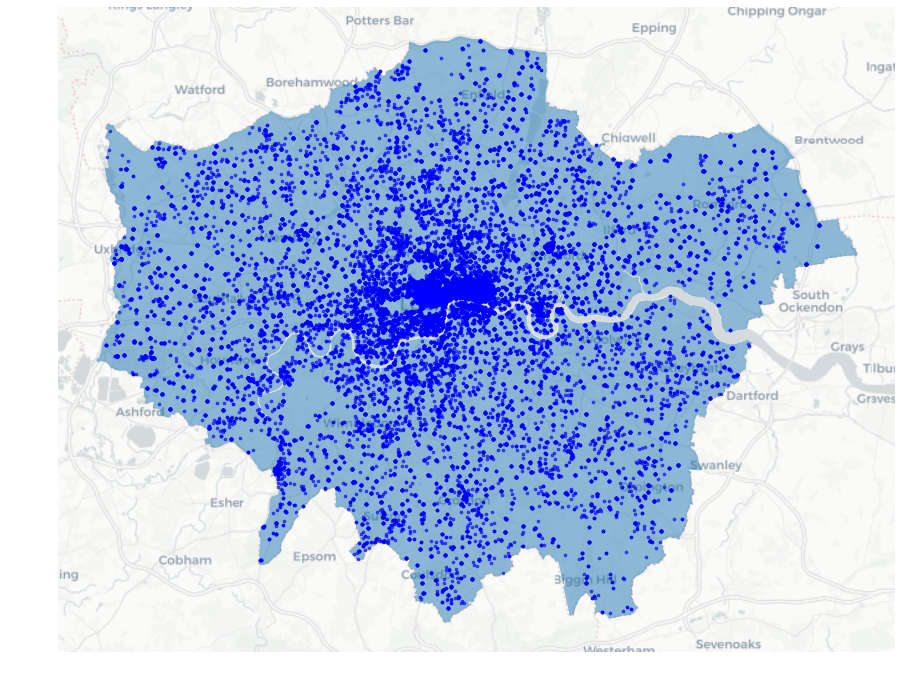

In [6]:
import contextily as ctx
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from geopandas.tools import sjoin
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
crs = {'init': 'epsg:7405'}

# function to plot basemap in the background
def add_basemap(ax, zoom, url="http://a.basemaps.cartocdn.com/light_all/tileZ/tileX/tileY.png"):#url='http://tile.stamen.com/toner/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

# there is an issue with couple of polygons that are not valid - they are intersecting in a small region, this has to be resolved otherwise no union/intersect/wihitnn function is working
# buffer(0) solution to validity was mentioned here : https://stackoverflow.com/questions/20833344/fix-invalid-polygon-python-shapely
# to check validity of polygons:
# polygon_validity = LSOA_polygon_EPSG3857.is_valid
# [x for x in polygon_validity if x == False]

# read and create valid LSOA polygon dataset, unite it and create a GeoDataFrame containing only this polygon
LSOA_polygon= gpd.read_file('C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//LSOA_IMD_London_polygon.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_polygon_EPSG3857 = LSOA_polygon.to_crs(epsg=3857)
LSOA_polygon_EPSG3857_valid = LSOA_polygon_EPSG3857.buffer(0)
LSOA_polygon_EPSG3857_valid_boundary = gpd.GeoSeries(cascaded_union(LSOA_polygon_EPSG3857_valid))
LSOA_polygon_EPSG3857_valid_boundary_gpd = GeoDataFrame({'Location' : ['All_London_LSOAs']}, crs={'init': 'epsg:3857'},geometry=LSOA_polygon_EPSG3857_valid_boundary)

# create GeoDataFrame from antenna dataset, change it to EPSG3857(only valid crs for plotting with basemaps) and join it with LSOA polygon
geometry = [Point(xy) for xy in zip(antenna_location.easting, antenna_location.northing)]
geo_antenna_location = antenna_location.drop(['easting', 'northing'], axis=1)
geo_antenna_location = GeoDataFrame(geo_antenna_location, crs=crs, geometry=geometry)
geo_antenna_location_EPSG3857 = geo_antenna_location.to_crs(epsg=3857)
geo_antenna_location_in_London_EPSG3857 = sjoin(geo_antenna_location_EPSG3857, LSOA_polygon_EPSG3857_valid_boundary_gpd, how='inner').drop(columns='index_right')    

# read HomeAntenna file for November 2018, merge it with antennas within London LSOAs and print out number of unique resident devices
residents_Nov_2018_loc = root_dir + 'HomeAntenna_November_2018.csv'
residents_Nov_2018 = pd.read_csv(residents_Nov_2018_loc).rename(columns={'home_antenna_id': 'lkey'})
London_residents_Nov_2018 = pd.merge(residents_Nov_2018, geo_antenna_location_EPSG3857, on='lkey', how='inner')
print('Unique resident devices in November 2018 in London : ' + str(len(residents_Nov_2018.device_id.unique())))
    
fig, ax = plt.subplots(figsize=(15,15), facecolor='w', edgecolor='k')
# set aspect to equal. This is done automatically when using *geopandas* plot on it's own, but not when working with pyplot directly.
ax.set_aspect('equal')
ax = plt.subplot(1,1,1)
#LSOA_polygon_EPSG3857.plot(ax=ax,alpha = 0.5, column='LSOA_IMD_decile',cmap=plt.cm.get_cmap('YlOrRd'))
LSOA_polygon_EPSG3857_valid_boundary.plot(ax=ax,alpha = 0.5)
geo_antenna_location_in_London_EPSG3857.plot(ax=ax, color='blue', marker='o', markersize=7, alpha = 0.6, legend=False)
add_basemap(ax, zoom=10)            
ax.set_axis_off()

# Appendix 2 - Antenna_ID | Generation | IMD Decile dataset for further processing

In [8]:
# Creata a LSOA polygon dataset from valid polygon boundaries
LSOA_polygon_EPSG3857_IMD = GeoDataFrame({'LSOA_IMD_decile' : LSOA_polygon_EPSG3857['LSOA_IMD_decile']}, crs={'init': 'epsg:3857'},geometry=LSOA_polygon_EPSG3857_valid)

# Merge it with antennas that are within London LSOA boundaries
geo_antenna_location_in_London_EPSG3857_LSOA_info = sjoin(geo_antenna_location_EPSG3857, LSOA_polygon_EPSG3857_IMD, how='inner').drop(columns='index_right')

# filter out antennas that do not have generation information or are 2G - both categories wouldn't be used in the further processing and this makes the file a bit more compact
geo_antenna_location_in_London_EPSG3857_LSOA_info = geo_antenna_location_in_London_EPSG3857_LSOA_info[geo_antenna_location_in_London_EPSG3857_LSOA_info.generation.notnull()]
geo_antenna_location_in_London_EPSG3857_LSOA_info = geo_antenna_location_in_London_EPSG3857_LSOA_info[geo_antenna_location_in_London_EPSG3857_LSOA_info.generation != '2G']

# save the file
location_to_save = "C://#CVUT//work_current//#Telefonica_internship//python//LondonAntennaGenerationIMD.csv"
geo_antenna_location_in_London_EPSG3857_LSOA_info.to_file(location_to_save, index=False, columns=['generation', 'lkey', 'LSOA_IMD_decile'], driver="CSV")

In [23]:
# Create a HomeAntenna dataset that has Device_id | lkey(Home_Antenna_ID) | Antenna_generation | Antenna_IMD_decile
#
# Column "count_home_antenna_id" was included only for check - dropping it
#
# There is slightly less residents compared to "London_residents_Nov_2018" due to fact that we do not have generation 
# information for some of the antennas and these antennas were dropped in previous step

HomeAntenna_Oct_2018_loc = "C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//AntennaDensity_by_Day//HomeAntenna_October_2018.csv"
HomeAntenna_Nov_2018_loc = "C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//AntennaDensity_by_Day//HomeAntenna_November_2018.csv"
HomeAntenna_Oct_2018 = pd.read_csv(HomeAntenna_Oct_2018_loc).rename(columns={'home_antenna_id' : 'lkey'})#.drop(columns='count_home_antenna_id')
HomeAntenna_Nov_2018 = pd.read_csv(HomeAntenna_Nov_2018_loc).rename(columns={'home_antenna_id' : 'lkey'})#.drop(columns='count_home_antenna_id')
LondonAntennaGenerationIMD = pd.read_csv('C://#CVUT//work_current//#Telefonica_internship//python//LondonAntennaGenerationIMD.csv')

HomeAntenna_Oct_2018_GenIMD = pd.merge(HomeAntenna_Oct_2018, LondonAntennaGenerationIMD, on='lkey', how='inner')
HomeAntenna_Nov_2018_GenIMD = pd.merge(HomeAntenna_Nov_2018, LondonAntennaGenerationIMD, on='lkey', how='inner')

# drop duplicates that are in place as of the 2 night time windows
HomeAntenna_Oct_2018_GenIMD_dd = HomeAntenna_Oct_2018_GenIMD.drop_duplicates(subset=['device_id','lkey'], keep='first')
HomeAntenna_Nov_2018_GenIMD_dd = HomeAntenna_Nov_2018_GenIMD.drop_duplicates(subset=['device_id','lkey'], keep='first')

# now the datasets include only unique device_id, lkey(home_antenna_id) pairs
# there is a minor set of residents(~20k) that have 2 different antennas with count of higher tha 13(again possible to 2 time windows)
# sort them according to device_id, count_home_antenna_id in ascending order and keep the home antenna with higher count(last antenna)
HomeAntenna_Oct_2018_GenIMD_dd_sorted = HomeAntenna_Oct_2018_GenIMD_dd.sort_values(['device_id', 'count_home_antenna_id'])
HomeAntenna_Oct_2018_GenIMD_dd_sorted = HomeAntenna_Oct_2018_GenIMD_dd_sorted.drop_duplicates(subset=['device_id'], keep='last')
HomeAntenna_Nov_2018_GenIMD_dd_sorted = HomeAntenna_Nov_2018_GenIMD_dd.sort_values(['device_id', 'count_home_antenna_id'])
HomeAntenna_Nov_2018_GenIMD_dd_sorted = HomeAntenna_Nov_2018_GenIMD_dd_sorted.drop_duplicates(subset=['device_id'], keep='last')

# save the files without count_home_antenna_id column which is not needed for further processing
HomeAntenna_Oct_2018_GenIMD_dd_sorted.drop(columns='count_home_antenna_id').to_csv("C://#CVUT//work_current//#Telefonica_internship//python//HomeAntenna_October_2018_GenerationIMD.csv",index=False)
HomeAntenna_Nov_2018_GenIMD_dd_sorted.drop(columns='count_home_antenna_id').to_csv("C://#CVUT//work_current//#Telefonica_internship//python//HomeAntenna_November_2018_GenerationIMD.csv",index=False)

In [27]:
print("Residents in within LSOA with IMD and antenna generation infromation in October 2018 :" + str(len(HomeAntenna_Oct_2018_GenIMD_dd_sorted.device_id))+ "\n" \
      "Residents in within LSOA with IMD and antenna generation infromation in November 2018 :"+ str(len(HomeAntenna_Nov_2018_GenIMD_dd_sorted.device_id)))

Residents in within LSOA with IMD and antenna generation infromation in October 2018 :1265602
Residents in within LSOA with IMD and antenna generation infromation in November 2018 :1167888


# Section 2 - Combine the datasets with LSOA dataset in QGIS 2.18.25

## 2.1 What we are going to do
### 2.1.1 We will import each set of antennas in QGIS, you may see the London LSOAs categorized by the IMD decile in the background 

![antennas](antennas.PNG)

### 2.1.2 We will calculate Voronoi tesselation and join the Voronoi cells with LSOAs, each LSOA will have mean and median value of all Voronoi cells that are within its area

![join_features](join_features.PNG)


## 2.2 How to in QGIS 2.28.25
### 2.2.1 Import processed layers in a single import

![layers_import](01_import_processed_layers.PNG)


### 2.2.2 Run batch Voronoi tesselation
![voronoi_tesselation](02_run_batch.PNG)


### 2.2.3 Join attributes of Voronoi cells with LSOA in a batch mode using a Geometric predicates "contains", "equals", "overlays", "within"
![join_attributes](03_join_attributes_by_location_batch.PNG)


# Section 3 - Analysis of the results

In [41]:
import os,fnmatch
import geopandas as gpd
import matplotlib.pyplot as plt
root_dir = 'C://#CVUT//work_current//#Telefonica_internship//qgis_project//layers//AntennaDensity_by_Day//grouped_and_filtered//'
fnmatch.filter(os.listdir(root_dir), '*_x_LSOA*')
#listdir(root_dir)

['AntennaDensity_all_weekdays_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_all_weekdays_October-November_2018_3G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_all_weekdays_October-November_2018_4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_all_weekends_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_all_weekends_October-November_2018_3G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_all_weekends_October-November_2018_4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_non_residents_weekdays_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_non_residents_weekdays_October-November_2018_3G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_non_residents_weekdays_October-November_2018_4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_non_residents_weekends_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson',
 'AntennaDensity_non_residents_weekends_October-Nove

In [49]:
# read the data and rename column with LSOA IMD decile to 'LSOA_IMD_decile' for easier handling in diagrams
LSOA_OctNov_2018_all_34G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_all_weekdays_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_all_3G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_all_weekdays_October-November_2018_3G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_all_4G_weekdays = gpd.read_file(root_dir +'AntennaDensity_all_weekdays_October-November_2018_4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})

LSOA_OctNov_2018_all_34G_weekends = gpd.read_file(root_dir + 'AntennaDensity_all_weekends_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_all_3G_weekends = gpd.read_file(root_dir + 'AntennaDensity_all_weekends_October-November_2018_3G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_all_4G_weekends = gpd.read_file(root_dir + 'AntennaDensity_all_weekends_October-November_2018_4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})

LSOA_OctNov_2018_residents_34G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_residents_weekdays_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_residents_3G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_residents_weekdays_October-November_2018_3G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_residents_4G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_residents_weekdays_October-November_2018_4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
 
LSOA_OctNov_2018_residents_34G_weekends = gpd.read_file(root_dir + 'AntennaDensity_residents_weekends_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_residents_3G_weekends = gpd.read_file(root_dir + 'AntennaDensity_residents_weekends_October-November_2018_3G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_residents_4G_weekends = gpd.read_file(root_dir + 'AntennaDensity_residents_weekends_October-November_2018_4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})

LSOA_OctNov_2018_non_residents_34G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_non_residents_weekdays_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_non_residents_3G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_non_residents_weekdays_October-November_2018_3G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_non_residents_4G_weekdays = gpd.read_file(root_dir + 'AntennaDensity_non_residents_weekdays_October-November_2018_4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})

LSOA_OctNov_2018_non_residents_34G_weekends = gpd.read_file(root_dir + 'AntennaDensity_non_residents_weekends_October-November_2018_3-4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_non_residents_3G_weekends = gpd.read_file(root_dir + 'AntennaDensity_non_residents_weekends_October-November_2018_3G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})
LSOA_OctNov_2018_non_residents_4G_weekends = gpd.read_file(root_dir + 'AntennaDensity_non_residents_weekends_October-November_2018_4G_processed_voronoi_x_LSOA.geojson').rename(columns={'LSOA_IMD_All_UK_Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)' : 'LSOA_IMD_decile'})

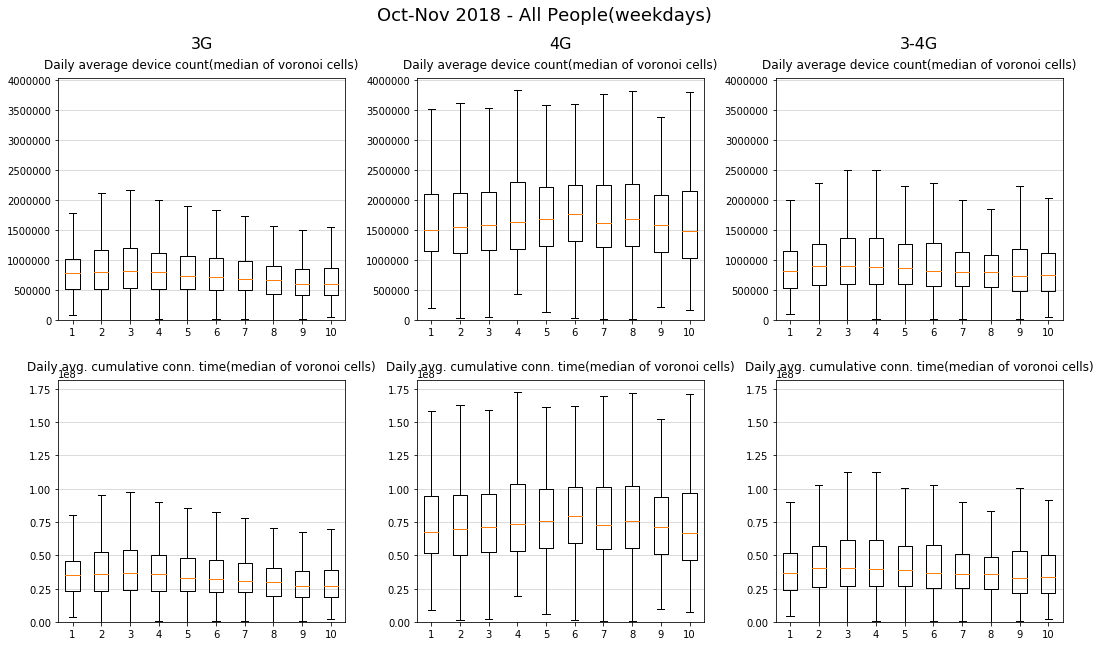

In [69]:
# define list of IMD that will in the boxplots
imd_list = [1,2,3,4,5,6,7,8,9,10]

# define basic layout of the diagrams
fig, big_axes = plt.subplots(figsize=(18,10), nrows=1, ncols=3, sharey=True, facecolor='w', edgecolor='k')

# CHOOSE IF YOU WANT MEAN OR MEDIAN VALUES IN BOXPLOTS
aggregation = 'median'

if aggregation == 'mean':
    sum_time = 'meansum_time'
    sum_devices = 'meansum_devices'
if aggregation == 'median':
    sum_time = 'mediansum_time'
    sum_devices = 'mediansum_devices'

# CHOOSE WHICH DATASET YOU WANT TO ANALYSE WITH BOXPLOTS (ONLY 1!)    
fig.suptitle('Oct-Nov 2018 - All People(weekdays)', fontsize=18)
#fig.suptitle('Oct-Nov 2018 - All People(weekends)', fontsize=18)
#fig.suptitle('Oct-Nov 2018 - Residents(weekdays)', fontsize=18)
#fig.suptitle('Oct-Nov 2018 - Residents(weekends)', fontsize=18)
#fig.suptitle('Oct-Nov 2018 - Non-Residents(weekdays)', fontsize=18)
#fig.suptitle('Oct-Nov 2018 - Non-Residents(weekends)', fontsize=18)

if fig._suptitle.get_text() == 'Oct-Nov 2018 - All People(weekdays)':
    dataset34g = LSOA_OctNov_2018_all_34G_weekdays.copy()
    dataset3g = LSOA_OctNov_2018_all_3G_weekdays.copy()
    dataset4g = LSOA_OctNov_2018_all_4G_weekdays.copy()
if fig._suptitle.get_text() == 'Oct-Nov 2018 - All People(weekends)':
    dataset34g = LSOA_OctNov_2018_all_34G_weekends.copy()
    dataset3g = LSOA_OctNov_2018_all_3G_weekends.copy()
    dataset4g = LSOA_OctNov_2018_all_4G_weekends.copy()
if fig._suptitle.get_text() == 'Oct-Nov 2018 - Residents(weekdays)':
    dataset34g = LSOA_OctNov_2018_residents_34G_weekdays.copy()
    dataset3g = LSOA_OctNov_2018_residents_3G_weekdays.copy()
    dataset4g = LSOA_OctNov_2018_residents_4G_weekdays.copy()    
if fig._suptitle.get_text() == 'Oct-Nov 2018 - Residents(weekends)':
    dataset34g = LSOA_OctNov_2018_residents_34G_weekends.copy()
    dataset3g = LSOA_OctNov_2018_residents_3G_weekends.copy()
    dataset4g = LSOA_OctNov_2018_residents_4G_weekends.copy()        
if fig._suptitle.get_text() == 'Oct-Nov 2018 - Non-Residents(weekdays)':
    dataset34g = LSOA_OctNov_2018_non_residents_34G_weekdays.copy()
    dataset3g = LSOA_OctNov_2018_non_residents_3G_weekdays.copy()
    dataset4g = LSOA_OctNov_2018_non_residents_4G_weekdays.copy()    
if fig._suptitle.get_text() == 'Oct-Nov 2018 - Non-Residents(weekends)':
    dataset34g = LSOA_OctNov_2018_non_residents_34G_weekends.copy()
    dataset3g = LSOA_OctNov_2018_non_residents_3G_weekends.copy()
    dataset4g = LSOA_OctNov_2018_non_residents_4G_weekends.copy()    

# this adds additional column titles 3G, 4G, 3-4G and removes a frame around all subplots
titles = ['3G', '4G','3-4G']
for row, big_ax in enumerate(big_axes, start=0):
    big_ax.set_title(titles[row], fontsize=16, pad=30)
    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top=False, bottom=False, left=False, right=False)
    # removes the white frame
    big_ax._frameon = False    

box_plot_dataset = list()
ax1 = fig.add_subplot(2,3,1)
for imd in imd_list:
    box_plot_dataset.append(dataset3g[sum_devices][dataset3g['LSOA_IMD_decile'] == imd])
box_plot_dict = plt.boxplot(box_plot_dataset, showfliers=False)
ax1.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
ax1.set_xlim([0.5,len(imd_list)+0.5])
plt.title("Daily average device count("+aggregation+" of voronoi cells)",fontsize=12,pad=10)
plt.axhline(color='black',linewidth=0.5)
min11_y,max11_y = ax1.get_ylim()

box_plot_dataset = list()
ax2 = fig.add_subplot(2,3,2)
for imd in imd_list:
    box_plot_dataset.append(dataset4g[sum_devices][dataset4g['LSOA_IMD_decile'] == imd])
box_plot_dict = plt.boxplot(box_plot_dataset, showfliers=False)
ax2.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
ax2.set_xlim([0.5,len(imd_list)+0.5])
plt.title("Daily average device count("+aggregation+" of voronoi cells)",fontsize=12,pad=10)
plt.axhline(color='black',linewidth=0.5)
min12_y,max12_y = ax2.get_ylim()

box_plot_dataset = list()
ax3 = fig.add_subplot(2,3,3)
for imd in imd_list:
    box_plot_dataset.append(dataset34g[sum_devices][dataset34g['LSOA_IMD_decile'] == imd])
box_plot_dict = plt.boxplot(box_plot_dataset, showfliers=False)
ax3.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
ax3.set_xlim([0.5,len(imd_list)+0.5])
plt.title("Daily average device count("+aggregation+" of voronoi cells)",fontsize=12,pad=10)
plt.axhline(color='black',linewidth=0.5)
min13_y,max13_y = ax3.get_ylim()

box_plot_dataset = list()
ax4 = fig.add_subplot(2,3,4)
for imd in imd_list:
    box_plot_dataset.append(dataset3g[sum_time][dataset3g['LSOA_IMD_decile'] == imd])
box_plot_dict = plt.boxplot(box_plot_dataset, showfliers=False)
ax4.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
ax4.set_xlim([0.5,len(imd_list)+0.5])
plt.title("Daily avg. cumulative conn. time("+aggregation+" of voronoi cells)",fontsize=12,pad=10)
plt.axhline(color='black',linewidth=0.5)
min21_y,max21_y = ax4.get_ylim()

box_plot_dataset = list()
ax5 = fig.add_subplot(2,3,5)
for imd in imd_list:
    box_plot_dataset.append(dataset4g[sum_time][dataset4g['LSOA_IMD_decile'] == imd])
box_plot_dict = plt.boxplot(box_plot_dataset, showfliers=False)
ax5.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
ax5.set_xlim([0.5,len(imd_list)+0.5])
plt.title("Daily avg. cumulative conn. time("+aggregation+" of voronoi cells)",fontsize=12,pad=10)
plt.axhline(color='black',linewidth=0.5)
min22_y,max22_y = ax5.get_ylim()

box_plot_dataset = list()
ax6 = fig.add_subplot(2,3,6)
for imd in imd_list:
    box_plot_dataset.append(dataset34g[sum_time][dataset34g['LSOA_IMD_decile'] == imd])
box_plot_dict = plt.boxplot(box_plot_dataset, showfliers=False)
ax6.yaxis.grid(True, linestyle='-', which='both', color='lightgrey')
ax6.set_xlim([0.5,len(imd_list)+0.5])
plt.title("Daily avg. cumulative conn. time("+aggregation+" of voronoi cells)",fontsize=12,pad=10)
plt.axhline(color='black',linewidth=0.5)
min23_y,max23_y = ax6.get_ylim()

min_y1 = min([min11_y, min12_y, min13_y])
min_y2 = min([min21_y, min22_y, min23_y])
max_y1 = max([max11_y, max12_y, max13_y])
max_y2 = max([max21_y, max22_y, max23_y])
#ax1.set_ylim([min_y1, max_y1])
#ax2.set_ylim([min_y1, max_y1])
#ax3.set_ylim([min_y1, max_y1])
#ax4.set_ylim([min_y2, max_y2])
#ax5.set_ylim([min_y2, max_y2])
#ax6.set_ylim([min_y2, max_y2])
ax1.set_ylim([0, max_y1])
ax2.set_ylim([0, max_y1])
ax3.set_ylim([0, max_y1])
ax4.set_ylim([0, max_y2])
ax5.set_ylim([0, max_y2])
ax6.set_ylim([0, max_y2])

plt.subplots_adjust(hspace = 0.25, wspace = 0.25)
plt.savefig(root_dir + "figs/" + fig._suptitle.get_text() +".png" , dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0,
        frameon=None, metadata=None)